In [3]:
import pandas as pd 
import numpy as np
import re
from matplotlib import pyplot as plt

In [14]:
name = pd.read_csv("D:/Courses/2nd Year/4.Data Science/-Sp-Data_Science_2019501125/DADV/Assignments/Task 1/Data/name.basics.tsv", sep = "\t", header = 0)
basics = pd.read_csv("D:/Courses/2nd Year/4.Data Science/-Sp-Data_Science_2019501125/DADV/Assignments/Task 1/Data/title.basics.tsv", sep = "\t", header = 0)
ratings = pd.read_csv("D:/Courses/2nd Year/4.Data Science/-Sp-Data_Science_2019501125/DADV/Assignments/Task 1/Data/title.ratings.tsv", sep = "\t", header = 0)

In [15]:
temp_basics = basics[basics["startYear"] != "\\N"]
temp_basics = temp_basics.astype({"startYear":"int"})
print(temp_basics.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          int32
endYear           object
runtimeMinutes    object
genres            object
dtype: object


In [16]:
sol = pd.merge(temp_basics, ratings, on = "tconst")
print(sol.head())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult  startYear endYear runtimeMinutes                    genres  \
0       0       1894      \N              1         Documentary,Short   
1       0       1892      \N              5           Animation,Short   
2       0       1892      \N              4  Animation,Comedy,Romance   
3       0       1892      \N             12           Animation,Short   
4       0       1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.7      1702  
1            6.1       210  
2            6.5      1462  


# To Find the 20 most popular movies with a rank more than 8.0

In [17]:
temp_result = sol[(sol['averageRating'] > 8.0) & (sol["titleType"] == 'movie')]
result = temp_result.sort_values(by = 'numVotes', ascending = False)
result.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
82010,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2395323
247878,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2357010
603022,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2115014
98403,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,1893016
81793,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1863186
80919,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,1852225
96277,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,1711221
89790,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1693856
113369,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",8.9,1673113
45835,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1659243


# To find the 20 best rated movies with over 40,000 votes in the 2000s (year >= 2000)

In [18]:
rated_movies = sol[(sol["numVotes"] >= 40000) & (sol["startYear"] >= 2000) & (sol["titleType"] == 'movie')]
res = rated_movies.sort_values(by = 'averageRating', ascending = False)
res.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
786429,tt2592910,movie,CM101MMXI Fundamentals,CM101MMXI Fundamentals,0,2013,\N,139,"Comedy,Documentary",9.2,44245
450112,tt10189514,movie,Soorarai Pottru,Soorarai Pottru,0,2020,\N,153,Drama,9.1,79146
247878,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2357010
113369,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",8.9,1673113
603022,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2115014
89790,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1693856
113370,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0,2002,\N,179,"Action,Adventure,Drama",8.7,1513014
978830,tt5813916,movie,The Mountain II,Dag II,0,2016,\N,135,"Action,Drama,War",8.7,106012
150097,tt0245429,movie,Spirited Away,Sen to Chihiro no kamikakushi,0,2001,\N,125,"Adventure,Animation,Family",8.6,671048
185047,tt0317248,movie,City of God,Cidade de Deus,0,2002,\N,130,"Crime,Drama",8.6,709497


# Data Analysis
# Convert it into a CSV file

In [19]:
name.to_csv('name_basics.csv')
basics.to_csv('title_basics.csv')
ratings.to_csv('title_ratings.csv')
# akas.to_csv('title_akas.csv')
# principals.to_csv('title_principals.csv')
# crew.to_csv('title_crew.csv')
# episode.to_csv('title_episode.csv')

In [20]:
print(basics.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object


In [21]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [22]:
basics["runtimeMinutes"] = pd.to_numeric(basics["runtimeMinutes"], errors="coerce")
basics["startYear"] = pd.to_numeric(basics["startYear"], errors="coerce")
basics["endYear"] = pd.to_numeric(basics["endYear"], errors="coerce")
basics = basics.astype({"isAdult" : bool})

# Find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [23]:
movies = sol[sol["titleType"] == "movie"]
movies_year_2000_2009 = movies[(movies["startYear"] >= 2000) & (movies["startYear"] <= 2009)]
movies_year_2000_2009 = movies_year_2000_2009.sort_values(by = ['averageRating','numVotes'], ascending = False)
print(movies_year_2000_2009.averageRating.iloc[0:9].mean())

9.855555555555554


# Find the year in the 1900s when the average rank increased the most, compared to theprevious year. (Ignore movies with votes < 1000)

In [24]:
movies_1900s = movies[(movies["startYear"] >= 1900) & (movies["startYear"] <= 2000)]
movies_1900s = movies_1900s[movies_1900s["numVotes"] >= 1000]
movies_1900s = movies_1900s.sort_values(by="startYear")
movies_1900s.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
993,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,2454
1186,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",7.0,2053
1216,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1047
1221,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",7.0,1413
1242,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",7.0,1099


In [25]:
movies_1900yearwise_total_avg_rank = movies_1900s.groupby(["startYear"]).mean()
movies_1900yearwise_total_avg_rank

,averageRating,numVotes
startYear,,
1911,7.000000,2454.000000
1913,6.900000,1497.600000
1914,6.560000,2037.600000
1915,6.780000,6415.800000
1916,6.950000,8006.000000
...,...,...
1996,6.338500,27797.600000
1997,6.420316,36972.851016
1998,6.430435,36117.408696


In [26]:
movies_1900yearwise_total_avg_rank["increased_rank"] = movies_1900yearwise_total_avg_rank["averageRating"] - movies_1900yearwise_total_avg_rank["averageRating"].shift(1)
movies_1900yearwise_total_avg_rank

,averageRating,numVotes,increased_rank
startYear,,,
1911,7.000000,2454.000000,NaN
1913,6.900000,1497.600000,-0.100000
1914,6.560000,2037.600000,-0.340000
1915,6.780000,6415.800000,0.220000
1916,6.950000,8006.000000,0.170000
...,...,...,...
1996,6.338500,27797.600000,-0.074294
1997,6.420316,36972.851016,0.081816
1998,6.430435,36117.408696,0.010119


In [27]:
movies_1900yearwise_total_avg_rank = movies_1900yearwise_total_avg_rank.sort_values(by="increased_rank",ascending=False)
movies_1900yearwise_total_avg_rank.head(1)

,averageRating,numVotes,increased_rank
startYear,,,
1962,7.047794,13500.242647,0.251213


# Find the expected average rank for 2013 using linear regression. How good is this regression? (Ignore movies with votes <= 1000.)

In [28]:
movies_Votes_greater_1000 = movies[movies['numVotes'] >= 1000]
movies_yearwise_total_avg_rank = movies_Votes_greater_1000.groupby(["startYear"]).mean()
movies_yearwise_total_avg_rank.index

Int64Index([1911, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
            ...
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='startYear', length=110)

In [29]:
movies_yearwise_total_avg_rank.reset_index(level = 0, inplace = True)
movies_yearwise_total_avg_rank

,startYear,averageRating,numVotes
0,1911,7.000000,2454.000000
1,1913,6.900000,1497.600000
2,1914,6.560000,2037.600000
3,1915,6.780000,6415.800000
4,1916,6.950000,8006.000000
...,...,...,...
105,2017,6.177182,20777.575038
106,2018,6.260556,18893.214286
107,2019,6.251582,20237.621265
108,2020,6.133655,12677.739310


In [30]:
movies_yearwise_total_avg_rank[movies_yearwise_total_avg_rank['startYear'] == 2013]

,startYear,averageRating,numVotes
101,2013,6.201606,32642.809806


# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
LinearModel = LinearRegression()
x = np.array(movies_yearwise_total_avg_rank['numVotes']).reshape(-1, 1)
y = movies_yearwise_total_avg_rank['averageRating']
LinearModel.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
movies_2013 = movies_Votes_greater_1000[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]
movies_2013

C:\Users\mrani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
201917,tt0359950,movie,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,0,2013,\N,114,"Adventure,Comedy,Drama",7.3,297766
223972,tt0409379,movie,In Secret,In Secret,0,2013,\N,107,"Crime,Drama,Thriller",6.1,7887
242219,tt0453562,movie,42,42,0,2013,\N,128,"Biography,Drama,Sport",7.5,88349
246314,tt0463960,movie,The Devil You Know,The Devil You Know,0,2013,\N,76,"Mystery,Thriller",3.4,1634
248039,tt0469021,movie,Alan Partridge,Alan Partridge: Alpha Papa,0,2013,\N,90,"Action,Comedy,Crime",6.9,30119
...,...,...,...,...,...,...,...,...,...,...,...
859208,tt3720788,movie,The Disappearance of Eleanor Rigby: Her,The Disappearance of Eleanor Rigby: Her,0,2013,\N,100,"Drama,Romance",6.9,8799
880876,tt4097826,movie,The Firefly,La luciérnaga,0,2013,\N,85,"Drama,Fantasy,Romance",6.1,1146
880996,tt4103686,movie,City of God: 10 Years Later,Cidade de Deus: 10 Anos Depois,0,2013,\N,70,Documentary,6.4,1200
1002637,tt6208032,movie,Lovely Trash,Ashghal haye Doost Dashtani,0,2013,\N,86,"Drama,Fantasy",6.7,1064


In [34]:
movies_2013_avg = movies_2013.mean()
movies_2013_avg['numVotes']

32642.809805579036

In [35]:
movies_2013_avg_numVotes = movies_2013_avg['numVotes']
movies_2013_avg_numVotes = movies_2013_avg_numVotes.reshape(1, -1)
LinearModel.predict(movies_2013_avg_numVotes)

array([6.30549635])

# Find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?

In [36]:
movies_1900s["averageRating"].corr(movies_1900s["numVotes"])

0.19001057737581337

In [37]:
groupby_year = movies_1900s.groupby(by="startYear")
years = groupby_year.groups.keys()
yearly_correlation = {}
for year in years:
    year_group = groupby_year.get_group(year)
    yearly_correlation[year] = year_group["averageRating"].corr(year_group["numVotes"])
yearly_correlation = pd.DataFrame(yearly_correlation.items(),columns=["year","correlation"])
yearly_correlation.sort_values(by="year")
yearly_correlation

C:\Users\mrani\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\mrani\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,year,correlation
0,1911,NaN
1,1913,-0.466987
2,1914,0.283999
3,1915,-0.651848
4,1916,1.000000
...,...,...
84,1996,0.199851
85,1997,0.232059
86,1998,0.245373
87,1999,0.249658


# Draw a scatterplot of rank vs votes for every movie with at least 10,000 votes. (x - axis = votes, y - axis = rank)

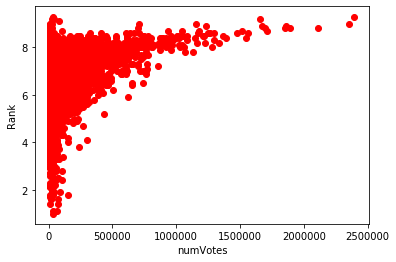

In [38]:
movies_10000 = movies[movies["numVotes"] >= 10000]
plt.scatter(movies_10000["numVotes"],movies_10000["averageRating"],color = "r")
plt.xlabel("numVotes")
plt.ylabel("Rank")
plt.show()